# Practica Clustering k-means (Vinos)

### Mineria de Datos
#### Gerardo Luis Muriel

## 1-Importar librerias

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




## 2-Importar los datos

In [4]:
vinos=pd.read_csv("data/caracteristicas de vinos.csv")

## 3-Preprocesamiento

In [5]:
vinos.head(10)

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,7,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,8,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,9,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,10,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### 3.1-Seleccionar conjunto de datos

In [9]:
xl=vinos.drop(["Vino"],axis=1)

In [10]:
xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### 3.2. Verificar si es necesario normalizar los datos

In [11]:
xl.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Normalizando los datos...

In [12]:
xlnorm=(xl-xl.min())/(xl.max()-xl.min())

In [13]:
xlnorm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.3-Analisis de componentes principales

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_xlnorm = pca.fit_transform(xlnorm)
pca_xlnorm_df = pd.DataFrame(data = pca_xlnorm,columns = ['PCA1','PCA2','PCA3'])
xlnorm_pca = pd.concat([pca_xlnorm_df,xlnorm],axis=1)

In [17]:
pca_xlnorm_df.head(10)

,PCA1,PCA2,PCA3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
5,-0.608190,-0.487519,-0.075433
6,-0.544047,-0.300196,-0.105075
7,-0.474357,-0.298197,-0.002821
8,-0.500432,-0.307603,-0.230494
9,-0.627518,-0.206328,-0.114148


## 4-Visualizacion

Text(0, 0.5, 'PCA2')

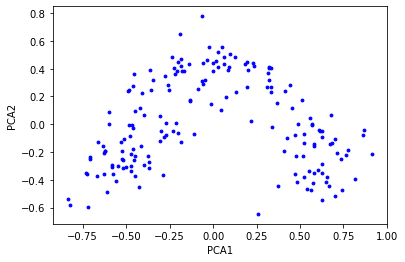

In [28]:
fig,ax=plt.subplots()

ax.scatter(x = pca_xlnorm_df.PCA1, y = pca_xlnorm_df.PCA2,c='blue',s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


Text(0.5, 0, 'PCA3')

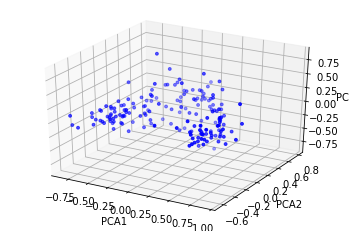

In [32]:
fig,ax=plt.subplots()
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_xlnorm_df.PCA1, pca_xlnorm_df.PCA2, pca_xlnorm_df.PCA3,c='blue',s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


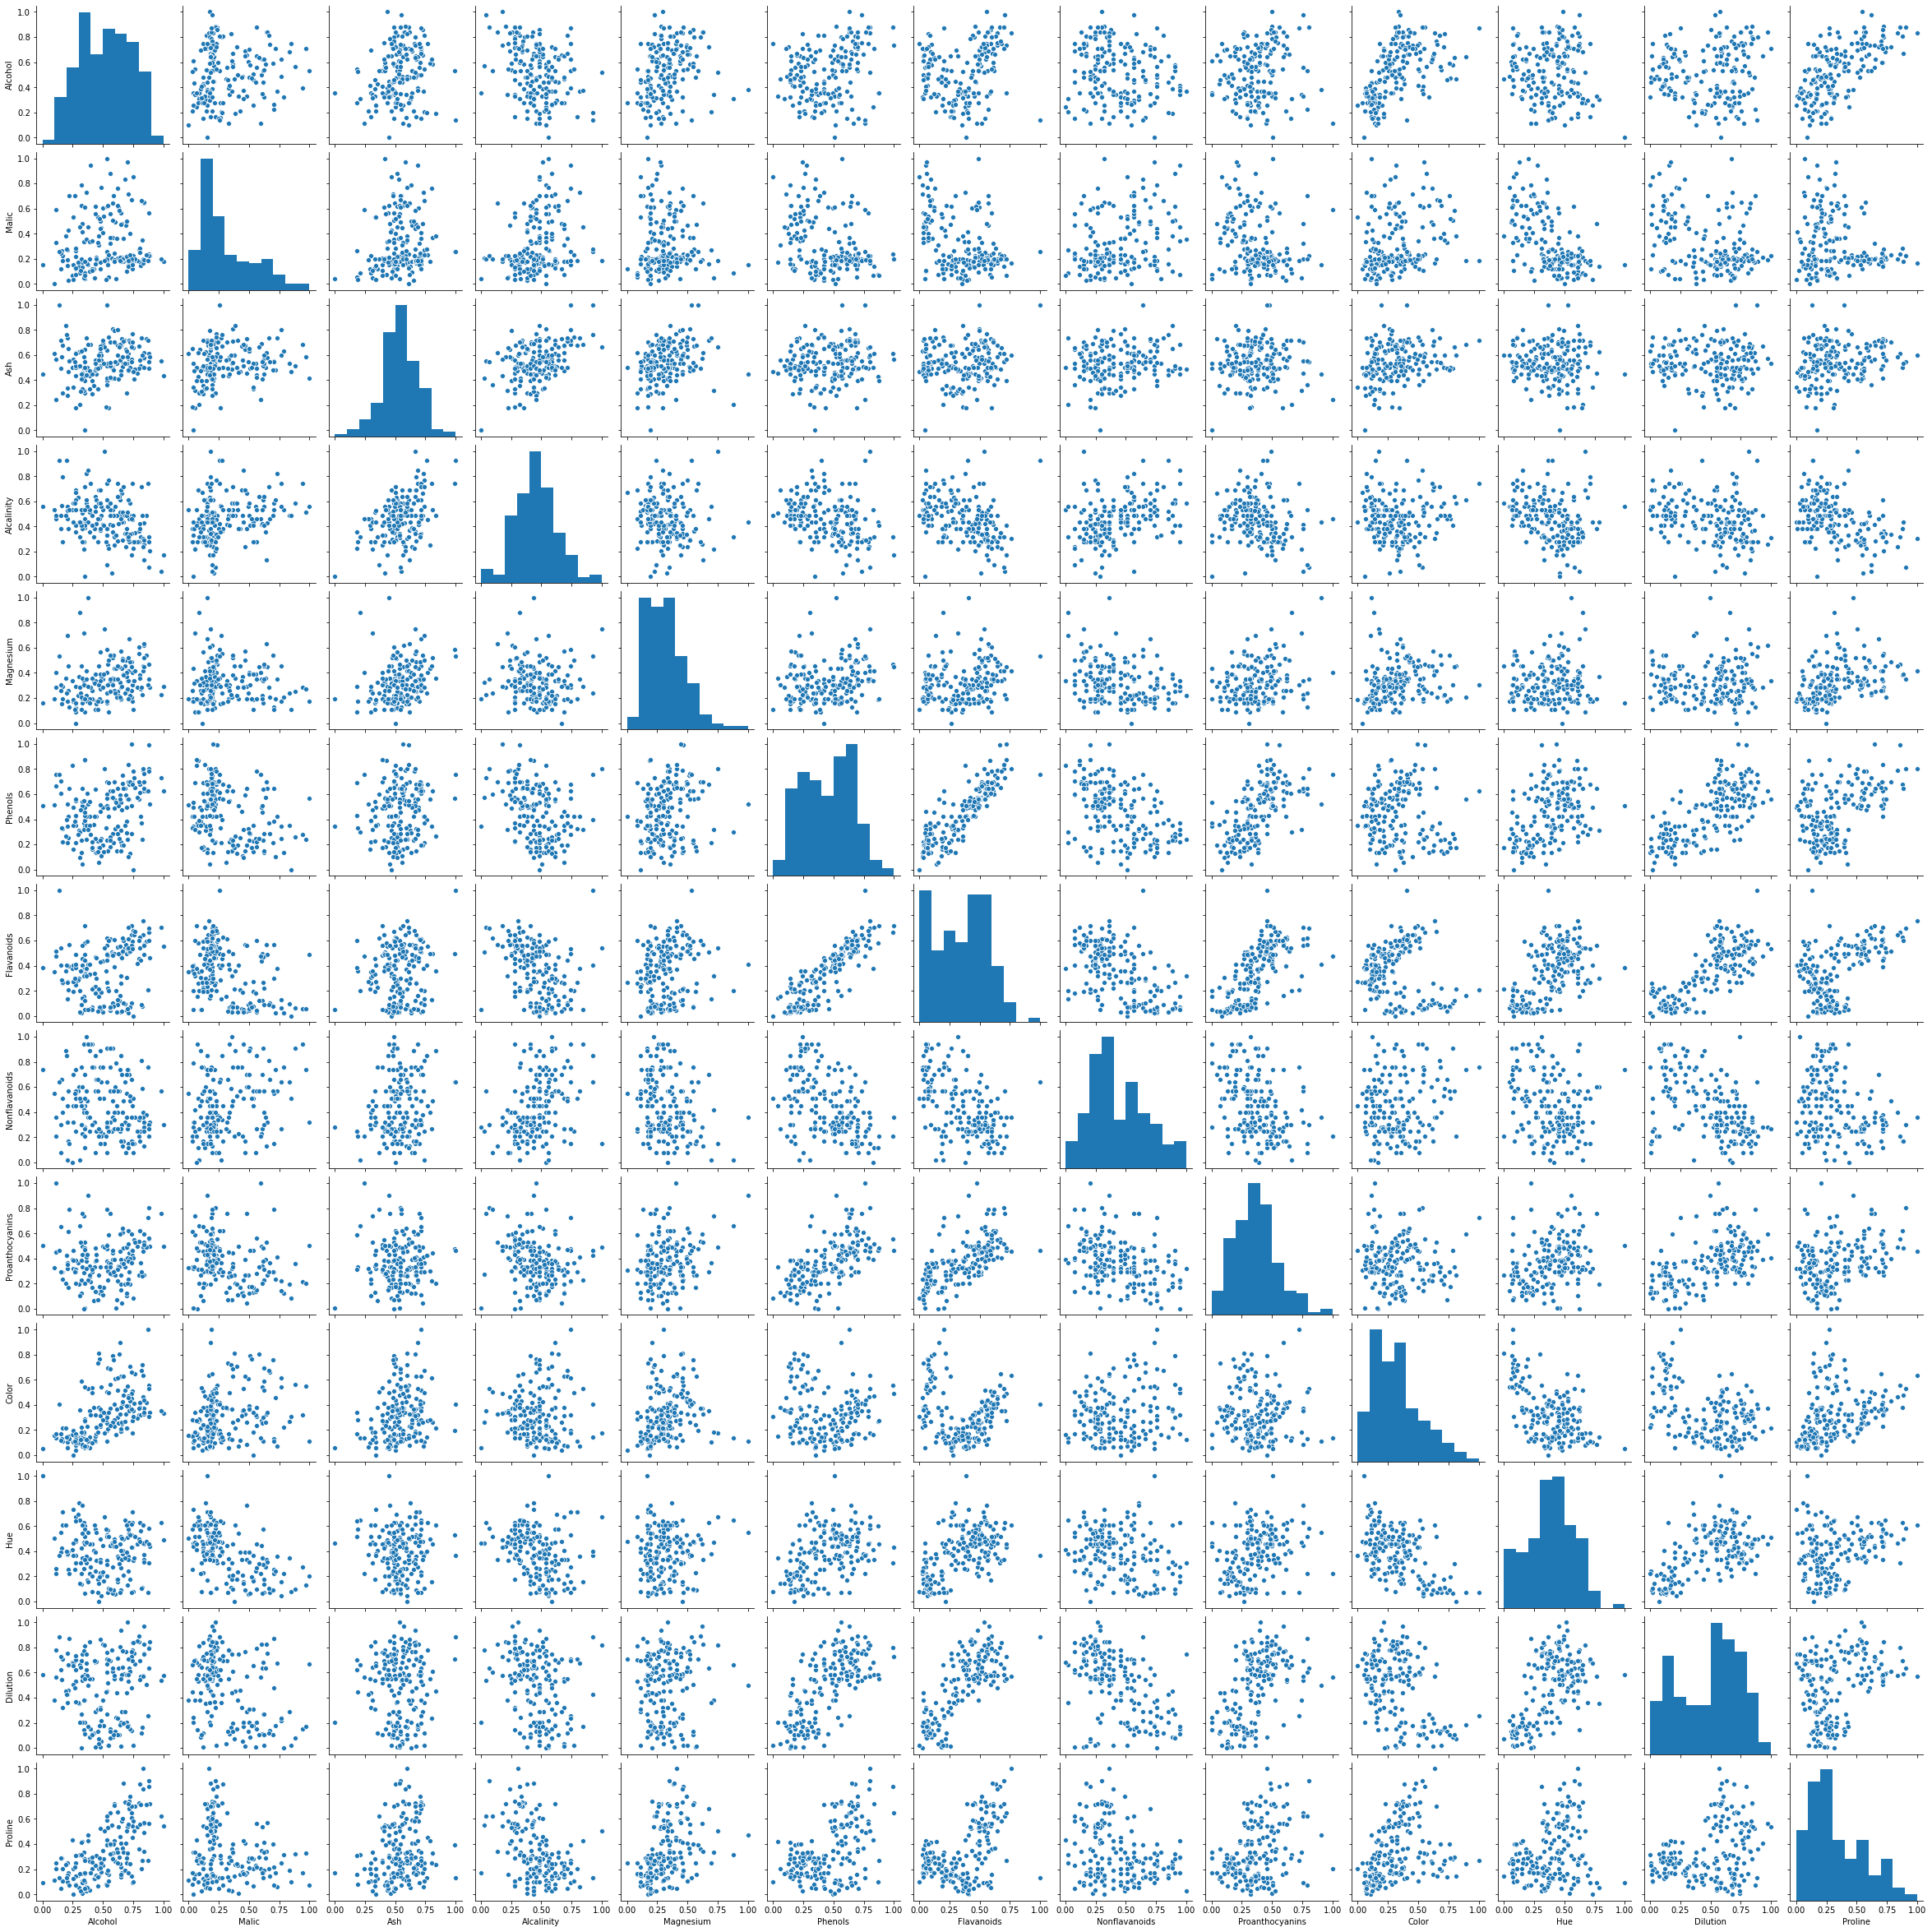

In [36]:
sns.pairplot(xlnorm)

## 5-Definicion de numero de clases (k) optima 

Se hace empiricamente teniendo un amplio conocimiento de los datos, o si no realizando varias agrupaciones con diferentes numero de clases, y calculando el valor de "Variacion entre cluster", definido como:

$E=\sum_{i=1}^{k} \sum_{p \in C_{i}}dist(p,c_{i})^{2}$

$Donde:\\E: Suma\ del\ error\ cuadratico\\ p:\ es\ el\ punto\ que\ representa\ un\ dato\\ c_{i}\ es\ el\ centroide\ del\ agrupamiento\ C_{i}\\ k:\ es\ numero\ de\ agrupamientos\ $

In [37]:
ec=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,max_iter = 300)
    kmeans.fit(pca_xlnorm_df)
    ec.append(kmeans.inertia_)


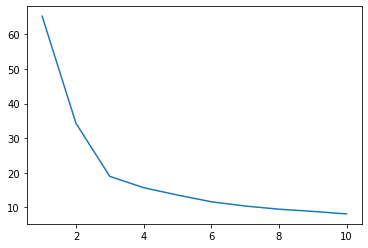

In [38]:
plt.plot(range(1,11),ec)

### 6-Creacion de Agrupamientos

In [41]:
kmeans = KMeans(n_clusters = 3,max_iter = 300)
kmeans.fit(pca_xlnorm_df[['PCA1','PCA2']])


KMeans(n_clusters=3)

In [45]:
pca_xlnorm_df['grupo']=kmeans.labels_
pca_xlnorm_df.head(10)

,PCA1,PCA2,PCA3,grupo
0,-0.706336,-0.253193,0.024093,2
1,-0.484977,-0.008823,-0.280482,2
2,-0.521172,-0.189187,0.196217,2
3,-0.821644,-0.580906,0.081110,2
4,-0.202546,-0.059467,0.300240,2
5,-0.608190,-0.487519,-0.075433,2
6,-0.544047,-0.300196,-0.105075,2
7,-0.474357,-0.298197,-0.002821,2
8,-0.500432,-0.307603,-0.230494,2
9,-0.627518,-0.206328,-0.114148,2


Text(0, 0.5, 'PCA2')

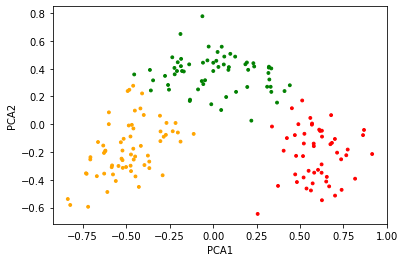

In [47]:
fig,ax=plt.subplots()

colores=np.array(['red','green','orange'])
ax.scatter(x = pca_xlnorm_df.PCA1, y = pca_xlnorm_df.PCA2,c=colores[pca_xlnorm_df.grupo],s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')